#1-1

MNIST 데이터셋을 사용하여 간단한 GAN을 구현한 코드입니다.

코드를 실행시키고, 주석을 달아주세요.

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image


In [2]:
num_epochs = 100
batch_size = 100
learning_rate = 0.0002
img_size = 28 * 28
noise_size = 100
hidden_size1 = 256
hidden_size2 = 512
hidden_size3 = 1024
dir_name = "GAN_results"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# 이미지 데이터를 정규화
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# MNIST 데이터셋을 다운로드하고, 학습용 데이터로 설정
MNIST_dataset = datasets.MNIST(root='../../data/',
                               train=True,
                               transform=transform,
                               download=True)

# 데이터를 배치 단위로 불러오는 데이터 로더
data_loader = torch.utils.data.DataLoader(dataset=MNIST_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [4]:
# 판별기(Discriminator) 정의
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(img_size, hidden_size3),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size3, hidden_size2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size2, hidden_size1),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


# 생성기(Generator) 정의: 노이즈에서 새로운 이미지를 생성
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, img_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

discriminator = Discriminator().to(device)
generator = Generator().to(device)


# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)


#아래는 모델 학습 과정

In [4]:
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        real_images = images.reshape(batch_size, -1).to(device)

        g_optimizer.zero_grad()

        z = torch.randn(batch_size, noise_size).to(device)
        fake_images = generator(z)

        g_loss = criterion(discriminator(fake_images), real_labels)
        g_loss.backward()
        g_optimizer.step()

        d_optimizer.zero_grad()

        z = torch.randn(batch_size, noise_size).to(device)
        fake_images = generator(z)

        real_loss = criterion(discriminator(real_images), real_labels)
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        d_optimizer.step()

        if (i + 1) % 150 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(data_loader)}], "
                  f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    save_image(fake_images.view(batch_size, 1, 28, 28),
               os.path.join(dir_name, f'GAN_fake_image_{epoch + 1}.png'))

    d_performance = discriminator(real_images).mean().item()
    g_performance = discriminator(fake_images).mean().item()
    print(f"---------Epoch [{epoch + 1}/{num_epochs}] : D Performance: {d_performance:.2f}, G Performance: {g_performance:.2f}")

Epoch [1/100], Step [150/600], D Loss: 0.0223, G Loss: 3.8002
Epoch [1/100], Step [300/600], D Loss: 0.1409, G Loss: 19.1798
Epoch [1/100], Step [450/600], D Loss: 0.0049, G Loss: 14.3654
Epoch [1/100], Step [600/600], D Loss: 0.0362, G Loss: 5.4207
---------Epoch [1/100] : D Performance: 0.97, G Performance: 0.00
Epoch [2/100], Step [150/600], D Loss: 0.0538, G Loss: 6.0443
Epoch [2/100], Step [300/600], D Loss: 0.0564, G Loss: 4.9597
Epoch [2/100], Step [450/600], D Loss: 0.3889, G Loss: 7.9902
Epoch [2/100], Step [600/600], D Loss: 1.2814, G Loss: 3.5474
---------Epoch [2/100] : D Performance: 0.57, G Performance: 0.51
Epoch [3/100], Step [150/600], D Loss: 0.0631, G Loss: 5.9095
Epoch [3/100], Step [300/600], D Loss: 0.3810, G Loss: 10.0865
Epoch [3/100], Step [450/600], D Loss: 1.1422, G Loss: 1.2913
Epoch [3/100], Step [600/600], D Loss: 0.7854, G Loss: 0.8877
---------Epoch [3/100] : D Performance: 0.67, G Performance: 0.52
Epoch [4/100], Step [150/600], D Loss: 0.3747, G Loss: 

#1-2

아래 마크다운으로 GAN_fake_image_1.png와 GAN_fake_image_100.png를 함께 첨부해주세요.

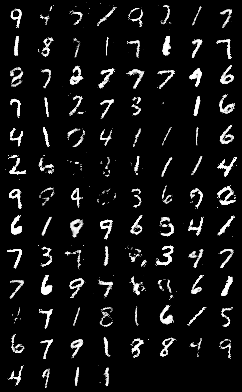

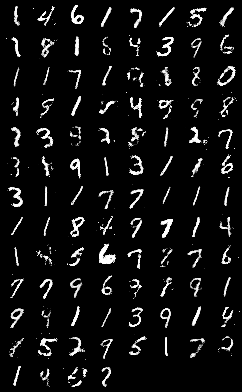